In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/github/LightGCN_PyTorch/code/log

/content/drive/MyDrive/github/LightGCN_PyTorch/code/log


In [ ]:
# load training log files
log_file1 = 'log_lighgcn_pytorch_20230704.txt'
log_file2 = 'log_mf_pytorch_20230726_1.txt'

In [ ]:
import re
import matplotlib.pyplot as plt

def read_scores(txtfile):
    # Initialize empty lists for precision, recall, and NDCG scores
    precision_scores = {i: None for i in range(0, 91, 10)}
    recall_scores = {i: None for i in range(0, 91, 10)}
    ndcg_scores = {i: None for i in range(0, 91, 10)}
    n=0
    # Initialize flag variable
    test_flag = False

    # Read the log file
    with open(txtfile, 'r') as file:
        lines = file.readlines()

    # Extract the scores from the log
    for line in lines:
        if line.startswith('[TEST]'):
            # Activate the flag when encountering the line with [TEST]
            test_flag = True
        elif test_flag:
            # Process the next line after [TEST]
            scores = re.findall(r"\d+\.\d+", line)
            if scores:
                precision_scores[n]=float(scores[0])
                recall_scores[n]=float(scores[1])
                ndcg_scores[n]=float(scores[2])
                # Deactivate the flag after processing the next line
                test_flag = False
                n+=10

    return precision_scores,recall_scores,ndcg_scores





In [ ]:
precision_scores1,recall_scores1,ndcg_scores1 = read_scores(log_file1)
precision_scores2,recall_scores2,ndcg_scores2 = read_scores(log_file2)

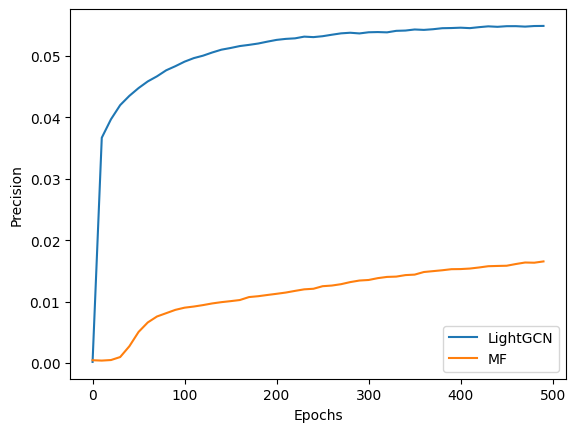

In [ ]:
plt.plot(precision_scores1.keys(), precision_scores1.values(), label='LightGCN')
plt.plot(precision_scores2.keys(), precision_scores2.values(), label='MF')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

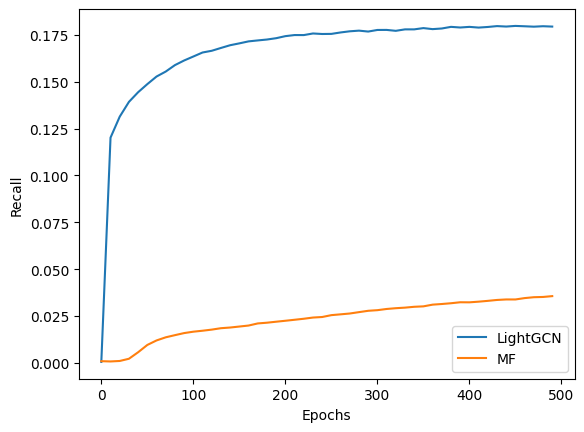

In [ ]:
plt.plot(recall_scores1.keys(), recall_scores1.values(), label='LightGCN')
plt.plot(recall_scores2.keys(), recall_scores2.values(), label='MF')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

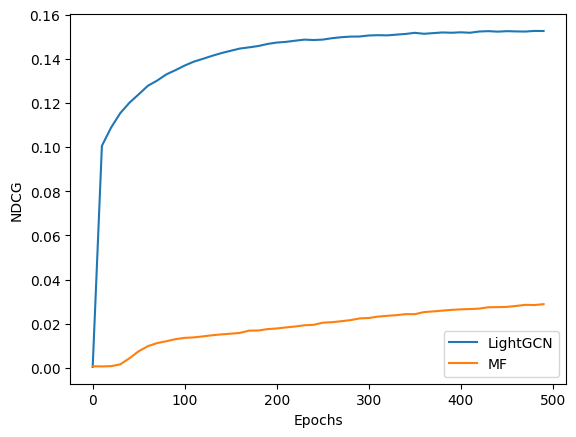

In [ ]:
plt.plot(ndcg_scores1.keys(), ndcg_scores1.values(), label='LightGCN')
plt.plot(ndcg_scores2.keys(), ndcg_scores2.values(), label='MF')
plt.xlabel('Epochs')
plt.ylabel('NDCG')
plt.legend()
plt.show()

In [ ]:
import re

def read_loss(txtfile):
    loss_scores = {i: None for i in range(0, 101)}
    n=1
    # Read the log file
    with open(txtfile, 'r') as file:
        lines = file.readlines()

    # Extract the loss scores from the log
    for line in lines:
        if "loss" in line:
            loss_value = re.findall(r"loss(\d+\.\d+)", line)
            if loss_value:
                loss_scores[n]=float(loss_value[0])
                n+=1
    return loss_scores



loss1 = read_loss(log_file1)
loss2 = read_loss(log_file2)

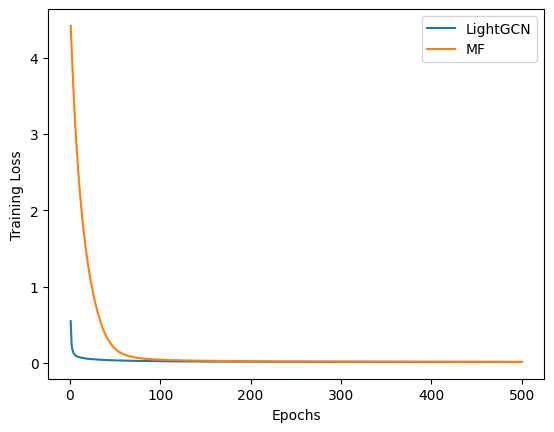

In [ ]:
plt.plot(loss1.keys(), loss1.values(), label='LightGCN')
plt.plot(loss2.keys(), loss2.values(), label='MF')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()